# Analysis notebook for valence judgments

In [2]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Parse valence from raw responses and save csvs

In [10]:
input_dir = '../datasets/llm_outputs/metacog/classification'

fp_coherent = f'{input_dir}/2024_coherent_metacog_classification.csv'
fp_gpt = f'{input_dir}/2024_llm_questions_gpt-4o-2024-08-06_metacog_classification.csv'
fp_llama = f'{input_dir}/2024_llm_questions_Meta-Llama-3.1-70B-Instruct_metacog_classification.csv'

df_coherent = pd.read_csv(fp_coherent)
df_gpt = pd.read_csv(fp_gpt)
df_llama = pd.read_csv(fp_llama)

In [11]:
# df_coherent.head()
df_gpt.head()

,Unnamed: 0,question_id,transcript_id,question_addressee,justice,question_text,opening_statement,full_text,metacog_classification_raw
0,0,q_f4341b19,2024.23-621-t01,petitioner,sotomayor,Can you elaborate on why a preliminary injunct...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""argumentation_and_clarif..."
1,1,q_bb41909e,2024.23-621-t01,petitioner,sotomayor,In cases where a preliminary injunction result...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""argumentation_and_clarif..."
2,2,q_61c81902,2024.23-621-t01,petitioner,sotomayor,How do you address situations where the only r...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""argumentation_and_clarif..."
3,3,q_f1f17a25,2024.23-621-t01,petitioner,sotomayor,What impact would your proposed bright-line ru...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n ""classification"": ""argumentation_and_clar..."
4,4,q_40a17162,2024.23-621-t01,petitioner,sotomayor,Are there specific precedents from this Court ...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","```json\n{\n ""classification"": ""precedent_and..."


In [12]:
def parse_classification(raw_resp):
    regex = r'"classification":\s*"([^"]+)"'
    match = re.search(regex, raw_resp)
    if match:
        return match.group(1)
    else:
        return None

In [13]:
df_coherent['metacog'] = df_coherent['metacog_classification_raw'].apply(parse_classification)
df_coherent.head()

,Unnamed: 0,question_id,transcript_id,question_addressee,justice,question_text,opening_statement,full_text,label,metacog_classification_raw,metacog
0,1,q_dd1235f1,2024.23-621-t01,petitioner,Clarence Thomas,But I thought your argument hinged on a court...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",coherent,"{\n""classification"": ""argumentation_and_clarif...",argumentation_and_clarification
1,3,q_e843e146,2024.23-621-t01,petitioner,Elena Kagan,"Well, it's -- it's true that it's only a lik...",<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",coherent,"{\n""classification"": ""argumentation_and_clarif...",argumentation_and_clarification
2,4,q_e052c4b2,2024.23-621-t01,petitioner,Ketanji Brown Jackson,But it's not that determination that's making...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",coherent,"{\n""classification"": ""argumentation_and_clarif...",argumentation_and_clarification
3,5,q_6a41e1e0,2024.23-621-t01,petitioner,Ketanji Brown Jackson,When you think about the difference between m...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",coherent,"{\n ""classification"": ""statutory_interpretati...",statutory_interpretation
4,7,q_8ddfdd01,2024.23-621-t01,petitioner,Ketanji Brown Jackson,But didn't Sole open -- leave open that --th...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",coherent,"{\n ""classification"": ""precedent_and_doctrine...",precedent_and_doctrine


In [14]:
df_gpt['metacog'] = df_gpt['metacog_classification_raw'].apply(parse_classification)
df_gpt.head()

,Unnamed: 0,question_id,transcript_id,question_addressee,justice,question_text,opening_statement,full_text,metacog_classification_raw,metacog
0,0,q_f4341b19,2024.23-621-t01,petitioner,sotomayor,Can you elaborate on why a preliminary injunct...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""argumentation_and_clarif...",argumentation_and_clarification
1,1,q_bb41909e,2024.23-621-t01,petitioner,sotomayor,In cases where a preliminary injunction result...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""argumentation_and_clarif...",argumentation_and_clarification
2,2,q_61c81902,2024.23-621-t01,petitioner,sotomayor,How do you address situations where the only r...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""argumentation_and_clarif...",argumentation_and_clarification
3,3,q_f1f17a25,2024.23-621-t01,petitioner,sotomayor,What impact would your proposed bright-line ru...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n ""classification"": ""argumentation_and_clar...",argumentation_and_clarification
4,4,q_40a17162,2024.23-621-t01,petitioner,sotomayor,Are there specific precedents from this Court ...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","```json\n{\n ""classification"": ""precedent_and...",precedent_and_doctrine


In [15]:
df_llama['metacog'] = df_llama['metacog_classification_raw'].apply(parse_classification)
df_llama.head()

,Unnamed: 0,question_id,transcript_id,question_addressee,justice,question_text,opening_statement,full_text,metacog_classification_raw,metacog
0,0,q_5b41d397,2024.23-621-t01,petitioner,sotomayor,"Petitioner, you argue that a preliminary injun...",<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""statutory_interpretation...",statutory_interpretation
1,1,q_b422b940,2024.23-621-t01,petitioner,sotomayor,Can you provide examples of cases where a prel...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n ""classification"": ""argumentation_and_clar...",argumentation_and_clarification
2,2,q_0814b033,2024.23-621-t01,petitioner,sotomayor,You rely on legal dictionaries from the time o...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""statutory_interpretation...",statutory_interpretation
3,3,q_11705d8e,2024.23-621-t01,petitioner,sotomayor,Doesn't the fact that a preliminary injunction...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""argumentation_and_clarif...",argumentation_and_clarification
4,4,q_55dd3b63,2024.23-621-t01,petitioner,sotomayor,"How would adopting a bright-line rule, as you ...",<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n ""classification"": ""judicial_role_and_revi...",judicial_role_and_review


Fix justice name column in llama and gpt Dataframes:

In [16]:
def update_justice_name(justice):
    if justice == 'sotomayor':
        return 'Sonia Sotomayor'
    elif justice == 'alito':
        return 'Samuel A. Alito, Jr.'
    else:
        return None

df_gpt['justice'] = df_gpt['justice'].apply(update_justice_name)
df_llama['justice'] = df_llama['justice'].apply(update_justice_name)
# df_gpt.head(30)

Filter out non-alito/sotomayor questions in actual coherent Dataframe

In [17]:
df_coherent = df_coherent[df_coherent['justice'].isin(['Sonia Sotomayor', 'Samuel A. Alito, Jr.'])]
df_coherent['justice'].value_counts()

justice
Sonia Sotomayor         73
Samuel A. Alito, Jr.    56
Name: count, dtype: int64

Save all updated dataframes as csvs

In [18]:
fp_actual = 'metacog/classification/actual_metacog.csv'
fp_gpt = 'metacog/classification/gpt_metacog.csv'
fp_llama = 'metacog/classification/llama_metacog.csv'


df_coherent.to_csv(fp_actual, index=False)
df_gpt.to_csv(fp_gpt, index=False)
df_llama.to_csv(fp_llama, index=False)

## Plots

In [22]:
fp_actual = 'metacog/classification/actual_metacog.csv'
fp_gpt = 'metacog/classification/gpt_metacog.csv'
fp_llama = 'metacog/classification/llama_metacog.csv'

actual_metacog = pd.read_csv(fp_actual)
gpt_metacog = pd.read_csv(fp_gpt)
llama_metacog = pd.read_csv(fp_llama)

#### Combine dataframes for plotting - all legalbench categories

In [23]:
# Select and rename relevant columns for merging
actual_metacog_clean = actual_metacog[['transcript_id', 'justice', 'metacog']].copy()
actual_metacog_clean['source'] = 'Actual'

gpt_metacog_clean = gpt_metacog[['transcript_id', 'justice', 'metacog']].copy()
gpt_metacog_clean['source'] = 'GPT-4'

llama_metacog_clean = llama_metacog[['transcript_id', 'justice', 'metacog']].copy()
llama_metacog_clean['source'] = 'LLaMA-3.1'

# Combine all datasets
combined_metacog = pd.concat([actual_metacog_clean, gpt_metacog_clean, llama_metacog_clean], ignore_index=True)


In [24]:
combined_metacog.head(10)

,transcript_id,justice,metacog,source
0,2024.23-621-t01,Sonia Sotomayor,argumentation_and_clarification,Actual
1,2024.23-621-t01,"Samuel A. Alito, Jr.",statutory_interpretation,Actual
2,2024.23-621-t01,"Samuel A. Alito, Jr.",argumentation_and_clarification,Actual
3,2024.23-621-t01,Sonia Sotomayor,case_facts_and_context,Actual
4,2024.23-621-t01,"Samuel A. Alito, Jr.",argumentation_and_clarification,Actual
5,2024.23-365 -t01,"Samuel A. Alito, Jr.",statutory_interpretation,Actual
6,2024.23-365 -t01,"Samuel A. Alito, Jr.",case_facts_and_context,Actual
7,2024.23-365 -t01,"Samuel A. Alito, Jr.",argumentation_and_clarification,Actual
8,2024.23-365 -t01,"Samuel A. Alito, Jr.",statutory_interpretation,Actual
9,2024.23-852-t01,Sonia Sotomayor,precedent_and_doctrine,Actual


In [25]:
# Group by and count occurrences
combined_metacog_proportions = (
    combined_metacog.groupby(['justice', 'transcript_id', 'source', 'metacog'])
    .size()
    .reset_index(name='count')
)

# Calculate proportions
combined_metacog_proportions['proportion'] = combined_metacog_proportions.groupby(
    ['justice', 'transcript_id', 'source']
)['count'].transform(lambda x: x / x.sum())

In [26]:
combined_metacog_proportions

,justice,transcript_id,source,metacog,count,proportion
0,"Samuel A. Alito, Jr.",2024.22-7466-t01,Actual,argumentation_and_clarification,1,0.200000
1,"Samuel A. Alito, Jr.",2024.22-7466-t01,Actual,judicial_role_and_review,1,0.200000
2,"Samuel A. Alito, Jr.",2024.22-7466-t01,Actual,precedent_and_doctrine,2,0.400000
3,"Samuel A. Alito, Jr.",2024.22-7466-t01,Actual,procedural_matters,1,0.200000
4,"Samuel A. Alito, Jr.",2024.22-7466-t01,GPT-4,argumentation_and_clarification,2,0.133333
...,...,...,...,...,...,...
265,Sonia Sotomayor,2024.23-980-t01,GPT-4,statutory_interpretation,3,0.187500
266,Sonia Sotomayor,2024.23-980-t01,LLaMA-3.1,argumentation_and_clarification,9,0.642857
267,Sonia Sotomayor,2024.23-980-t01,LLaMA-3.1,judicial_role_and_review,1,0.071429
268,Sonia Sotomayor,2024.23-980-t01,LLaMA-3.1,precedent_and_doctrine,1,0.071429


In [27]:
# # save df as csv
out_fp = 'metacog/classification/combined_metacog_proportions.csv'
combined_metacog_proportions.to_csv(out_fp, index=False)

## Plot stacked bar charts

<Figure size 1400x700 with 0 Axes>

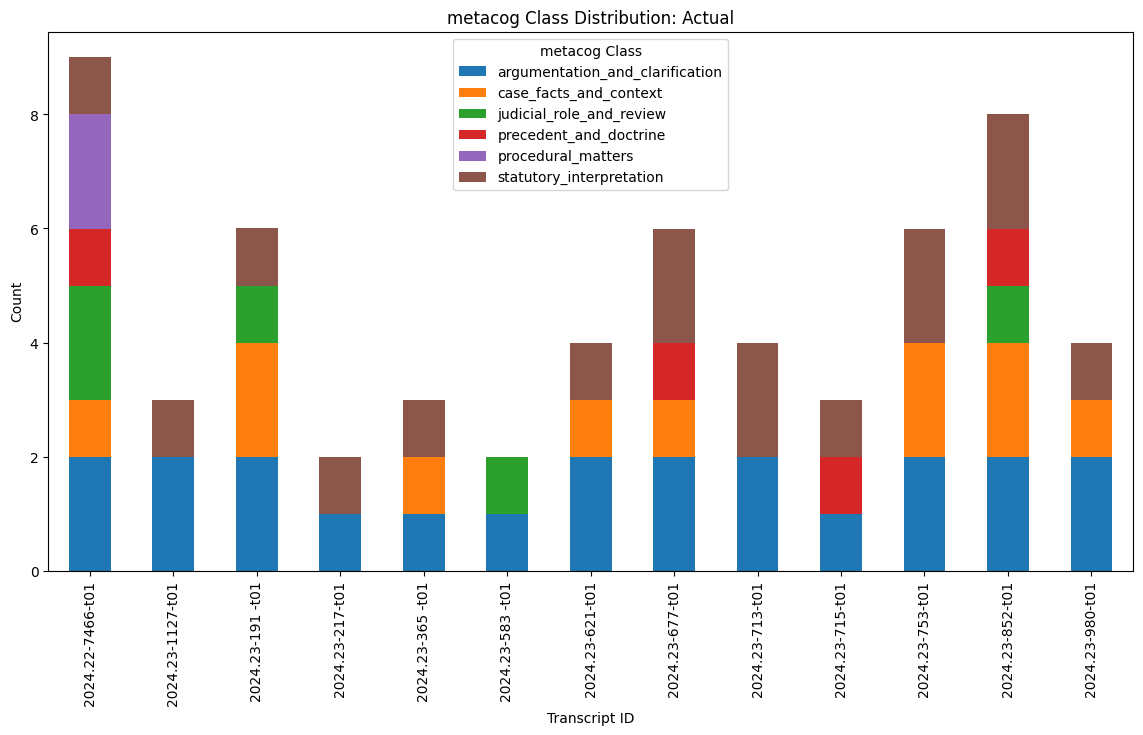

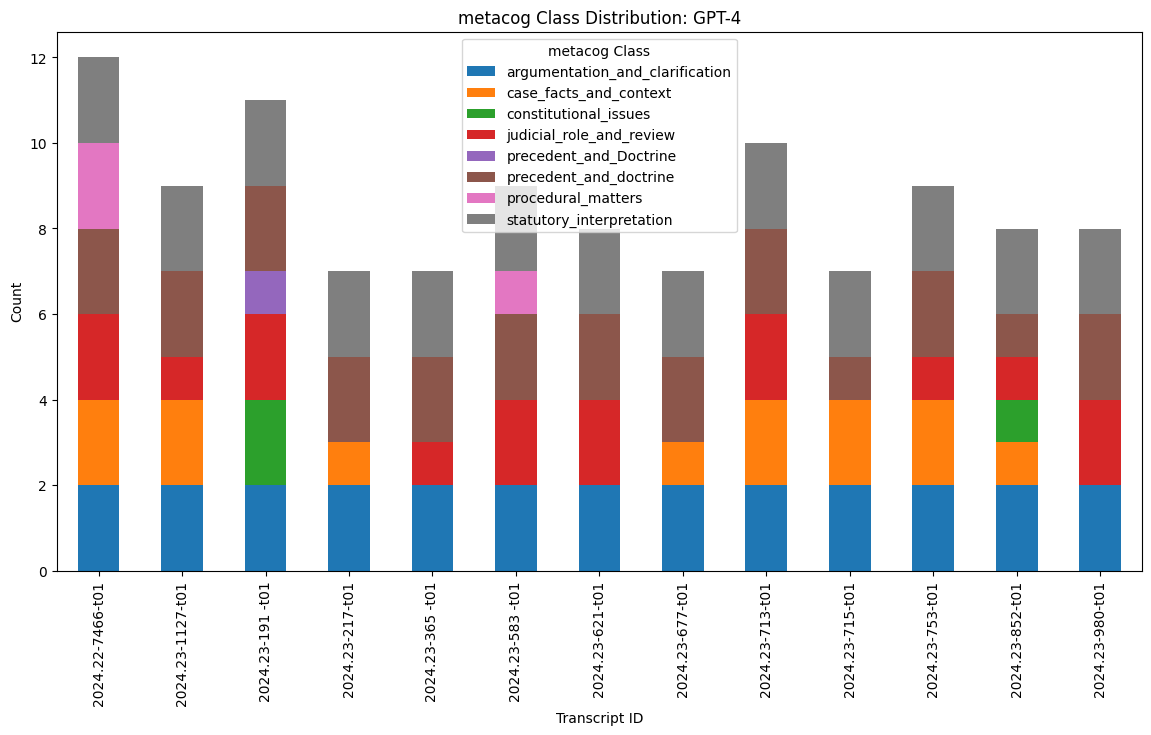

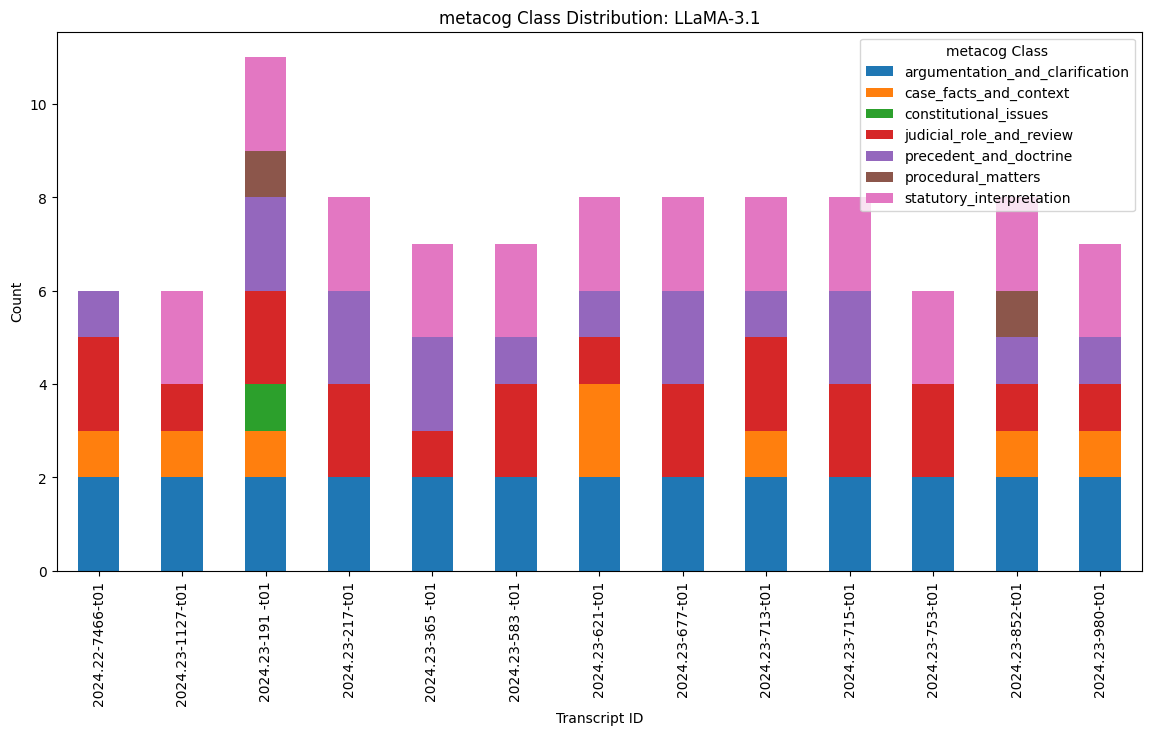

In [28]:
plt.figure(figsize=(14, 7))
for source, group in combined_metacog_proportions.groupby('source'):
    valence_counts = group.groupby('transcript_id')['metacog'].value_counts().unstack()
    valence_counts.plot(
        kind='bar', stacked=True, figsize=(14, 7),
        title=f"metacog Class Distribution: {source}", xlabel="Transcript ID", ylabel="Count",
    )
    plt.legend(title="metacog Class")
    plt.show()


## Heatmaps

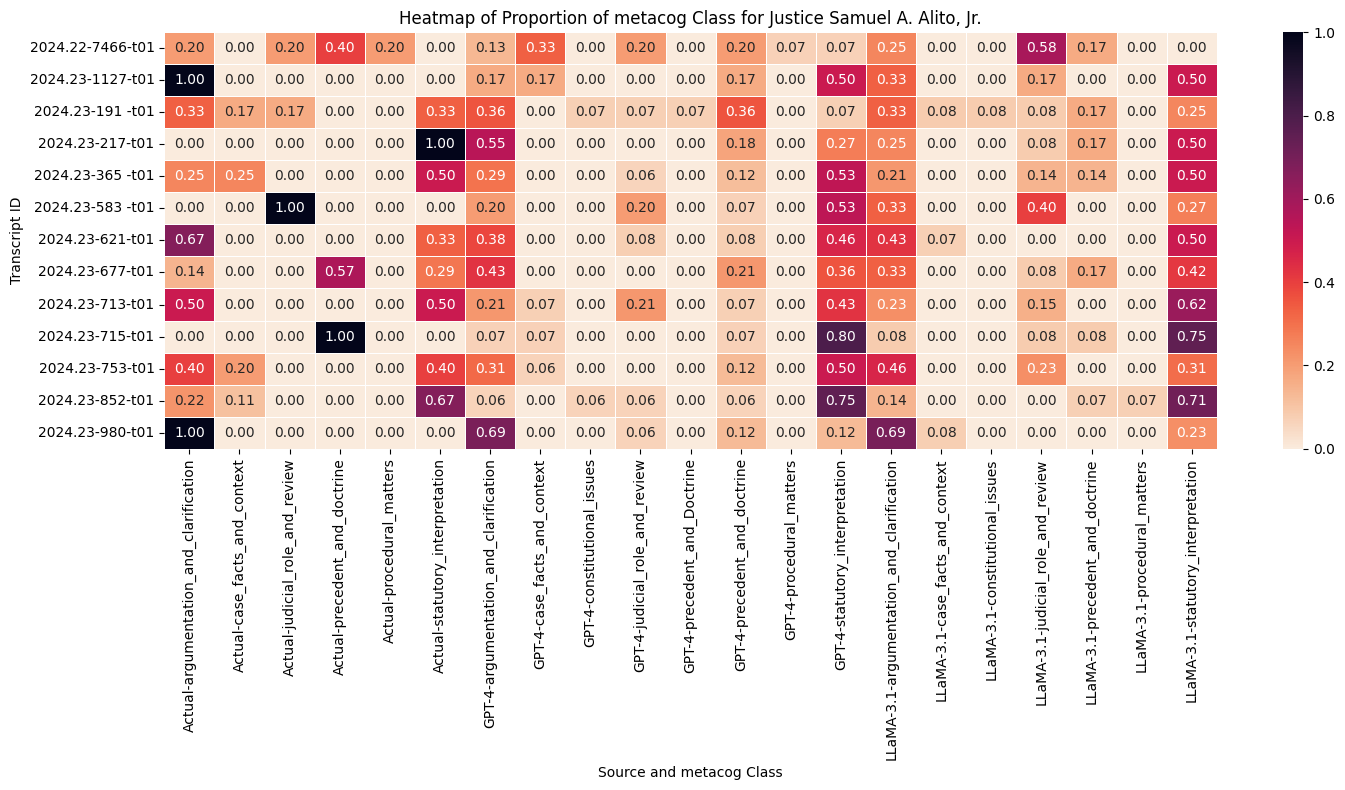

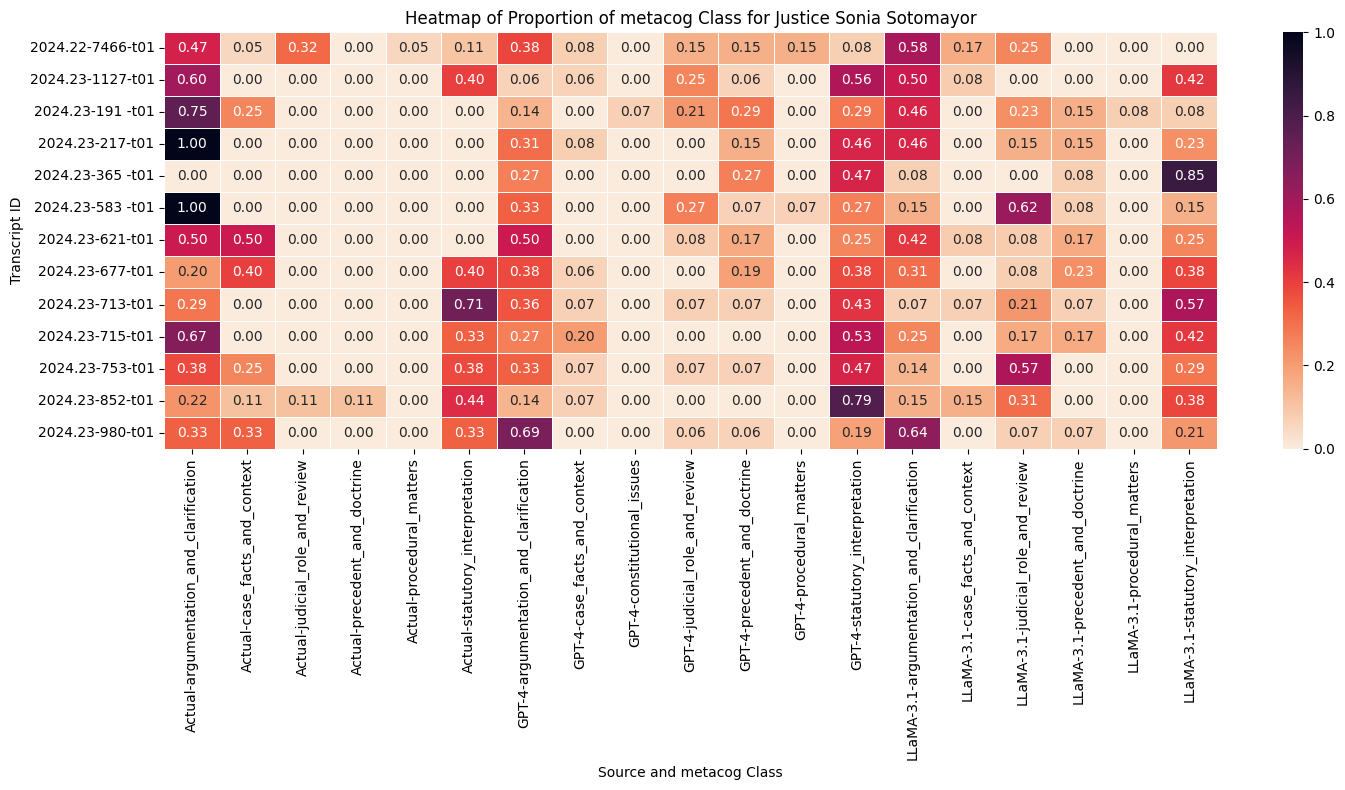

In [29]:
for justice in combined_metacog_proportions['justice'].unique():
    justice_subset = combined_metacog_proportions[combined_metacog_proportions['justice'] == justice]
    pivot_data = justice_subset.pivot_table(
        index='transcript_id', columns=['source', 'metacog'], values='proportion', fill_value=0
    )

    plt.figure(figsize=(15, 8))
    sns.heatmap(pivot_data, cmap="rocket_r", annot=True, fmt=".2f", linewidths=.5)
    plt.title(f"Heatmap of Proportion of metacog Class for Justice {justice}")
    plt.xlabel("Source and metacog Class")
    plt.ylabel("Transcript ID")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'figures/{justice}_heatmap_metacog.png')
    plt.show()


## Pie Charts

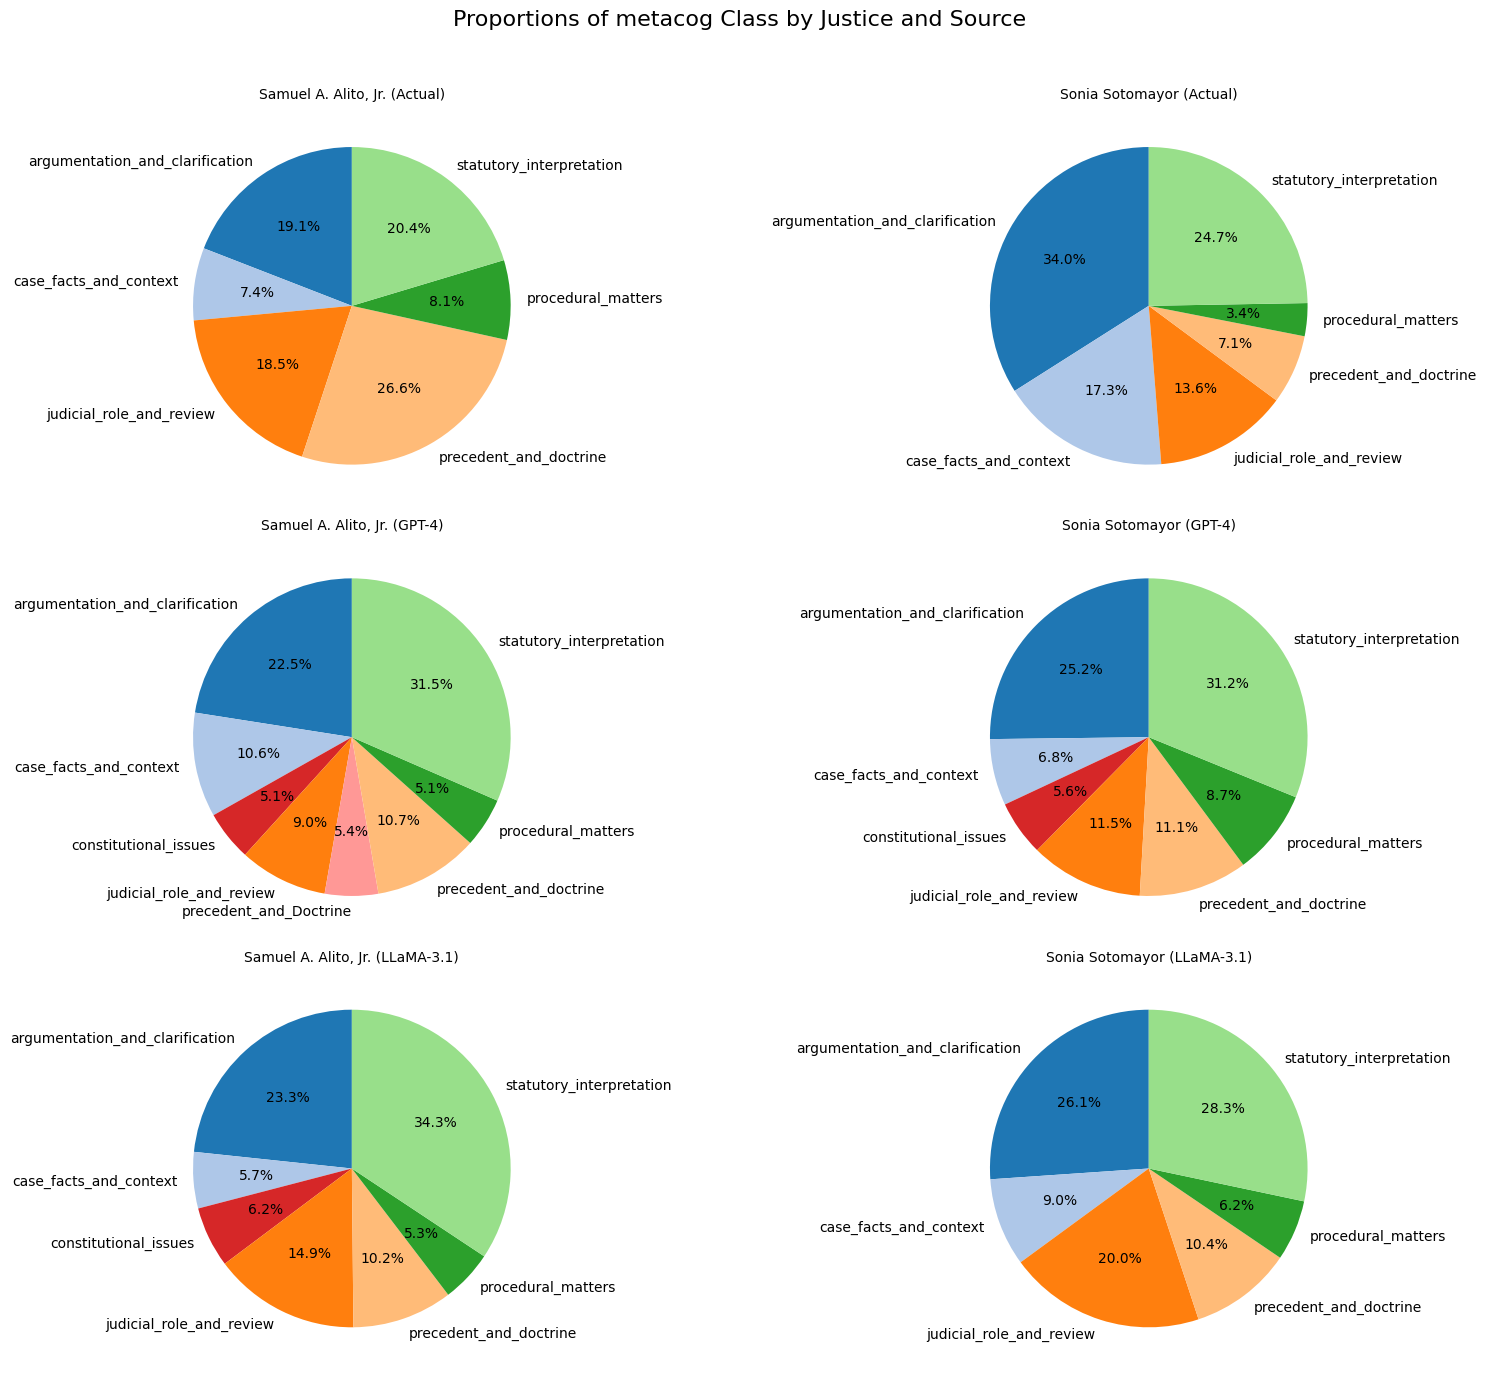

In [34]:
# Group data to calculate mean proportions for each justice and source combination
mean_proportions_pie = combined_metacog_proportions.groupby(['source', 'justice', 'metacog'])['proportion'].mean().reset_index()

# Get unique sources and justices
sources = mean_proportions_pie['source'].unique()
justices = mean_proportions_pie['justice'].unique()

# colors
metacog_categories = mean_proportions_pie['metacog'].unique()
color_palette = plt.cm.tab20.colors[:len(metacog_categories)]
color_map = dict(zip(metacog_categories, color_palette))

# plot
fig, axes = plt.subplots(len(sources), len(justices), figsize=(16, 14), subplot_kw={'aspect': 'equal'})

for i, source in enumerate(sources):
    for j, justice in enumerate(justices):
        ax = axes[i, j]
        subset = mean_proportions_pie[(mean_proportions_pie['source'] == source) & 
                                      (mean_proportions_pie['justice'] == justice)]
        if not subset.empty:
            colors = [color_map[category] for category in subset['metacog']]
            ax.pie(
                subset['proportion'], 
                labels=subset['metacog'], 
                autopct='%1.1f%%',
                startangle=90,
                colors=colors
            )
            ax.set_title(f"{justice} ({source})", fontsize=10)
        else:
            ax.axis('off')  # Hide empty plots

plt.suptitle('Proportions of metacog Class by Justice and Source', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('figures/piecharts_metacog.png')
plt.show()
